In [28]:
from arcgis.gis import GIS
from arcgis.mapping import WebMap

In [29]:
# gis = GIS("https://ej.maps.arcgis.com", "Nakamura_Hiromu")
gis = GIS("https://nakamura-dev-org.maps.arcgis.com", "nakamura_dev_org")

Enter password:  ··············


In [30]:
fs = gis.content.get("1db20409b01749c7bb5ba3013d5f78d7")

In [31]:
a = [lyr for lyr in fs.layers if lyr.properties["name"] == "図郭_500"]

In [32]:
a = a[0]

In [33]:
a

<FeatureLayer url:"https://services9.arcgis.com/O9WfSnXAKH2Zv9nK/arcgis/rest/services/kunihara_すいどうさーびす_3857_WFL1/FeatureServer/14">

In [34]:
a.properties["extent"]

{'xmin': 15542370.439705636,
 'ymin': 4237197.968742227,
 'xmax': 15546061.32110239,
 'ymax': 4240905.3153556185,
 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}

In [72]:
# fset = a.query(where = "図郭番号 = 'AB3' OR 図郭番号 = 'AD5'", return_extent_only=True, out_sr=3857)

In [14]:
# hiyoshi_water_map = gis.content.get("6a59e9b5ab4b4b74acd60c759b73d0fc")

In [15]:
# WebMap(hiyoshi_water_map).definition.spatialReference

---

### クエリ時にsrをwebメルカトルに指定して渡す

<Item title:"kunihara_すいどうさーびす_3857" type:Web Map owner:nakamura_dev_org>
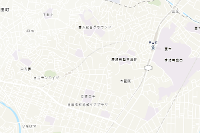

In [35]:
wm = gis.content.get("ab1578714ccc4851bb18d0d70eb96c6e")
wm

In [36]:
from arcgis.mapping import WebMap
wm = WebMap(wm)
wm.definition.spatialReference

{
  "wkid": 102100,
  "latestWkid": 3857
}

In [124]:
# wm.definition.spatialReference = {'wkid': 102618, 'latestWkid': 6677}
# wm.update()
# wm.definition.spatialReference

In [215]:
# 失敗
fset = a.query(where = "図郭番号 = 'AD4'", return_extent_only=True, out_sr=102618)
extent = fset["extent"]
extent

{'xmin': -18385.46865905466,
 'ymin': -50766.54151889066,
 'xmax': -17883.43935409721,
 'ymax': -50264.51225879982,
 'spatialReference': {'wkid': 102618, 'latestWkid': 6677}}

In [218]:
# 失敗
fset = a.query(where = "図郭番号 = 'AD4'", out_sr=4326, return_extent_only=True)
extent = fset["extent"]
extent

{'xmin': 139.6305662578472,
 'ymin': 35.54225025891928,
 'xmax': 139.63609190295767,
 'ymax': 35.546766338667666,
 'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}

In [154]:
extent = [[139.63056625785023, 35.542250258564614], [139.6360919027484, 35.54676633853776]]

In [239]:
# 失敗
fset = a.query(where = "図郭番号 = 'AC5' OR 図郭番号 = 'AE2'", out_sr=102100, return_extent_only=True)
extent = fset["extent"]
extent

{'xmin': 15542988.35432458,
 'ymin': 4238432.464056221,
 'xmax': 15545442.865642738,
 'ymax': 4240287.423681395,
 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}

In [19]:
query_list = []

In [20]:
for zukaku in lst:
    query = "図郭番号 = '{}'".format(zukaku)
    query_list.append(query)

In [21]:
query_list

["図郭番号 = 'AC5,AE2'"]

In [13]:
sql = " OR ".join(query_list)

In [14]:
sql

"図郭番号 = 'AC5' OR 図郭番号 = 'AE2'"

In [16]:
fset = a[0].query(where = sql, return_extent_only=True, out_sr=102100)

In [17]:
fset

{'extent': {'xmin': 15542988.35432458,
  'ymin': 4238432.464056221,
  'xmax': 15545442.865642738,
  'ymax': 4240287.423681395,
  'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}}

In [240]:
item_prop = {'title': 'test_' + str(extent["spatialReference"]["latestWkid"]),
             'snippet': '',
             'tags': ['test', 'final', 'distance']}

In [241]:
wm.offline_areas.create(area=extent,
                        item_properties=item_prop,
#                         refresh_rates={"hour": 14, "minute": 59},
                        refresh_schedule="Daily",
                        min_scale=2000,
                        max_scale=250)

<Item title:"test_3857" type:Map Area owner:nakamura_dev_org>

In [37]:
test = wm.offline_areas.list()[0]

In [38]:
ext = test.properties["extent"]

In [39]:
ext

{'xmin': 15543598.480645131,
 'ymin': 4240283.770529184,
 'xmax': 15544213.731172845,
 'ymax': 4240901.764995099,
 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}

In [41]:
from arcgis.geometry import Polygon
ext_poly = Polygon({"rings": [[[ext["xmin"], ext["ymin"]],
                              [ext["xmin"], ext["ymax"]],
                              [ext["xmax"], ext["ymax"]],
                              [ext["xmax"], ext["ymin"]],
                              [ext["xmin"], ext["ymin"]]]],
                    "spatialReference": ext["spatialReference"]})

In [42]:
from arcgis.features import GeoAccessor
from arcgis.geometry import Point

sedf = GeoAccessor.from_layer(a)
sedf.head()

OID 図郭番号            CreationDate           Creator                EditDate  \
0  840  AB3 2020-06-17 10:32:14.223  nakamura_dev_org 2020-06-17 10:32:14.223   
1  869  AC1 2020-06-17 10:32:14.223  nakamura_dev_org 2020-06-17 10:32:14.223   
2  870  AC2 2020-06-17 10:32:14.223  nakamura_dev_org 2020-06-17 10:32:14.223   
3  871  AC3 2020-06-17 10:32:14.223  nakamura_dev_org 2020-06-17 10:32:14.223   
4  872  AC4 2020-06-17 10:32:14.223  nakamura_dev_org 2020-06-17 10:32:14.223   

             Editor    Shape__Area  Shape__Length  \
0  nakamura_dev_org  378683.480469    2461.496656   
1  nakamura_dev_org  378640.757812    2461.357770   
2  nakamura_dev_org  378641.015625    2461.358633   
3  nakamura_dev_org  378641.281250    2461.359473   
4  nakamura_dev_org  378641.531250    2461.360290   

                               GlobalID  \
0  f4b337d6-bfc2-4246-8c73-0e52c6b3ad7b   
1  3902c2c6-ca68-4266-b9ac-cdefcaf1fb6f   
2  20e708cc-39e3-42e4-8b80-95170599b493   
3  c2799912-4e04-4dfe-82c3-f76b5e32f82a   
4  58becc69-b230-4f1a-ba7d-7206a42ec078   

                                               SHAPE  
0  {"rings": [[[15543599.7446547, 4240283.7705291...  
1  {"rings": [[[15542373.1049343, 4239664.4553152...  
2  {"rings": [[[15542987.056515, 4239665.77631768...  
3  {"rings": [[[15543601.0083838, 4239667.0628019...  
4  {"rings": [[[15544214.9605331, 4239668.3147679...

In [43]:
new_sedf = sedf.assign(centroid_xy = sedf["SHAPE"].geom.centroid)

In [44]:
new_sedf.head()

OID 図郭番号            CreationDate           Creator                EditDate  \
0  840  AB3 2020-06-17 10:32:14.223  nakamura_dev_org 2020-06-17 10:32:14.223   
1  869  AC1 2020-06-17 10:32:14.223  nakamura_dev_org 2020-06-17 10:32:14.223   
2  870  AC2 2020-06-17 10:32:14.223  nakamura_dev_org 2020-06-17 10:32:14.223   
3  871  AC3 2020-06-17 10:32:14.223  nakamura_dev_org 2020-06-17 10:32:14.223   
4  872  AC4 2020-06-17 10:32:14.223  nakamura_dev_org 2020-06-17 10:32:14.223   

             Editor    Shape__Area  Shape__Length  \
0  nakamura_dev_org  378683.480469    2461.496656   
1  nakamura_dev_org  378640.757812    2461.357770   
2  nakamura_dev_org  378641.015625    2461.358633   
3  nakamura_dev_org  378641.281250    2461.359473   
4  nakamura_dev_org  378641.531250    2461.360290   

                               GlobalID  \
0  f4b337d6-bfc2-4246-8c73-0e52c6b3ad7b   
1  3902c2c6-ca68-4266-b9ac-cdefcaf1fb6f   
2  20e708cc-39e3-42e4-8b80-95170599b493   
3  c2799912-4e04-4dfe-82c3-f76b5e32f82a   
4  58becc69-b230-4f1a-ba7d-7206a42ec078   

                                               SHAPE  \
0  {"rings": [[[15543599.7446547, 4240283.7705291...   
1  {"rings": [[[15542373.1049343, 4239664.4553152...   
2  {"rings": [[[15542987.056515, 4239665.77631768...   
3  {"rings": [[[15543601.0083838, 4239667.0628019...   
4  {"rings": [[[15544214.9605331, 4239668.3147679...   

                               centroid_xy  
0  (15543906.114514455, 4240592.770570344)  
1  (15542679.423095606, 4239973.472341331)  
2    (15543293.39200437, 4239974.77622909)  
3   (15543907.36119748, 4239976.045594822)  
4  (15544521.330667341, 4239977.280438466)

In [45]:
c = []

In [46]:
len(new_sedf)

30

In [47]:
for i in range(len(new_sedf)):
    value = Point({"x": new_sedf["centroid_xy"][i][0], "y": new_sedf["centroid_xy"][i][1], "spatialReference": new_sedf.spatial.sr})
    c.append(value)

In [48]:
new_sedf["centroid"] = c

In [49]:
new_sedf.head()

OID 図郭番号            CreationDate           Creator                EditDate  \
0  840  AB3 2020-06-17 10:32:14.223  nakamura_dev_org 2020-06-17 10:32:14.223   
1  869  AC1 2020-06-17 10:32:14.223  nakamura_dev_org 2020-06-17 10:32:14.223   
2  870  AC2 2020-06-17 10:32:14.223  nakamura_dev_org 2020-06-17 10:32:14.223   
3  871  AC3 2020-06-17 10:32:14.223  nakamura_dev_org 2020-06-17 10:32:14.223   
4  872  AC4 2020-06-17 10:32:14.223  nakamura_dev_org 2020-06-17 10:32:14.223   

             Editor    Shape__Area  Shape__Length  \
0  nakamura_dev_org  378683.480469    2461.496656   
1  nakamura_dev_org  378640.757812    2461.357770   
2  nakamura_dev_org  378641.015625    2461.358633   
3  nakamura_dev_org  378641.281250    2461.359473   
4  nakamura_dev_org  378641.531250    2461.360290   

                               GlobalID  \
0  f4b337d6-bfc2-4246-8c73-0e52c6b3ad7b   
1  3902c2c6-ca68-4266-b9ac-cdefcaf1fb6f   
2  20e708cc-39e3-42e4-8b80-95170599b493   
3  c2799912-4e04-4dfe-82c3-f76b5e32f82a   
4  58becc69-b230-4f1a-ba7d-7206a42ec078   

                                               SHAPE  \
0  {"rings": [[[15543599.7446547, 4240283.7705291...   
1  {"rings": [[[15542373.1049343, 4239664.4553152...   
2  {"rings": [[[15542987.056515, 4239665.77631768...   
3  {"rings": [[[15543601.0083838, 4239667.0628019...   
4  {"rings": [[[15544214.9605331, 4239668.3147679...   

                               centroid_xy  \
0  (15543906.114514455, 4240592.770570344)   
1  (15542679.423095606, 4239973.472341331)   
2    (15543293.39200437, 4239974.77622909)   
3   (15543907.36119748, 4239976.045594822)   
4  (15544521.330667341, 4239977.280438466)   

                                            centroid  
0  {'x': 15543906.114514455, 'y': 4240592.7705703...  
1  {'x': 15542679.423095606, 'y': 4239973.4723413...  
2  {'x': 15543293.39200437, 'y': 4239974.77622909...  
3  {'x': 15543907.36119748, 'y': 4239976.04559482...  
4  {'x': 15544521.330667341, 'y': 4239977.2804384...

In [50]:
new_sedf.spatial.set_geometry(col="centroid")

In [51]:
new_sedf.head()

OID 図郭番号            CreationDate           Creator                EditDate  \
0  840  AB3 2020-06-17 10:32:14.223  nakamura_dev_org 2020-06-17 10:32:14.223   
1  869  AC1 2020-06-17 10:32:14.223  nakamura_dev_org 2020-06-17 10:32:14.223   
2  870  AC2 2020-06-17 10:32:14.223  nakamura_dev_org 2020-06-17 10:32:14.223   
3  871  AC3 2020-06-17 10:32:14.223  nakamura_dev_org 2020-06-17 10:32:14.223   
4  872  AC4 2020-06-17 10:32:14.223  nakamura_dev_org 2020-06-17 10:32:14.223   

             Editor    Shape__Area  Shape__Length  \
0  nakamura_dev_org  378683.480469    2461.496656   
1  nakamura_dev_org  378640.757812    2461.357770   
2  nakamura_dev_org  378641.015625    2461.358633   
3  nakamura_dev_org  378641.281250    2461.359473   
4  nakamura_dev_org  378641.531250    2461.360290   

                               GlobalID  \
0  f4b337d6-bfc2-4246-8c73-0e52c6b3ad7b   
1  3902c2c6-ca68-4266-b9ac-cdefcaf1fb6f   
2  20e708cc-39e3-42e4-8b80-95170599b493   
3  c2799912-4e04-4dfe-82c3-f76b5e32f82a   
4  58becc69-b230-4f1a-ba7d-7206a42ec078   

                                               SHAPE  \
0  {"rings": [[[15543599.7446547, 4240283.7705291...   
1  {"rings": [[[15542373.1049343, 4239664.4553152...   
2  {"rings": [[[15542987.056515, 4239665.77631768...   
3  {"rings": [[[15543601.0083838, 4239667.0628019...   
4  {"rings": [[[15544214.9605331, 4239668.3147679...   

                               centroid_xy  \
0  (15543906.114514455, 4240592.770570344)   
1  (15542679.423095606, 4239973.472341331)   
2    (15543293.39200437, 4239974.77622909)   
3   (15543907.36119748, 4239976.045594822)   
4  (15544521.330667341, 4239977.280438466)   

                                            centroid  
0  {"x": 15543906.114514455, "y": 4240592.7705703...  
1  {"x": 15542679.423095606, "y": 4239973.4723413...  
2  {"x": 15543293.39200437, "y": 4239974.77622909...  
3  {"x": 15543907.36119748, "y": 4239976.04559482...  
4  {"x": 15544521.330667341, "y": 4239977.2804384...

In [53]:
m = gis.map("神奈川県")
m

MapView(layout=Layout(height='400px', width='100%'))

In [54]:
m.draw(ext_poly)

In [55]:
new_sedf.spatial.plot(m)

True

In [59]:
result = new_sedf.spatial.select(ext_poly)

In [60]:
result.values

array([[840, 'AB3', Timestamp('2020-06-17 10:32:14.223000'),
        'nakamura_dev_org', Timestamp('2020-06-17 10:32:14.223000'),
        'nakamura_dev_org', 378683.48046875, 2461.49665588482,
        'f4b337d6-bfc2-4246-8c73-0e52c6b3ad7b',
        {'rings': [[[15543599.7446547, 4240283.77052918], [15543598.4806451, 4240900.51247433], [15544212.5015397, 4240901.7649951], [15544213.7311728, 4240285.02277255], [15543599.7446547, 4240283.77052918]]], 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}},
        (15543906.114514455, 4240592.770570344),
        {'x': 15543906.114514455, 'y': 4240592.770570344, 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}]],
      dtype=object)

In [61]:
print(",".join(result))

OID,図郭番号,CreationDate,Creator,EditDate,Editor,Shape__Area,Shape__Length,GlobalID,SHAPE,centroid_xy,centroid


In [64]:
lst = [][0]

IndexError: list index out of range

In [63]:
lst[0]

IndexError: list index out of range

結果：四点すべてずれる

---

### クエリ時に平面直角のまま渡す

In [904]:
fset = a.query(where = "図郭番号 = 'AF3'", return_extent_only=True)
extent = fset["extent"]
extent

{'xmin': -18384.44000000041,
 'ymin': -50765.5270000007,
 'xmax': -17884.44000000041,
 'ymax': -50265.5270000007,
 'spatialReference': {'wkid': 102618, 'latestWkid': 6677}}

In [905]:
extent = {'xmin': -18384.44000000041,
 'ymin': -50765.5270000007,
 'xmax': -17884.44000000041,
 'ymax': -50265.5270000007,
 'spatialReference': {'wkid': 102618}}

<Item title:"kunihara_water_さーびす" type:Web Map owner:Nakamura_Hiromu>
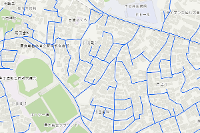

In [906]:
wm = gis.content.get("d392e88fd77a4d28b332f63945e7290c")
wm

In [907]:
from arcgis.mapping import WebMap
wm = WebMap(wm)
wm.definition.spatialReference

{
  "wkid": 102100,
  "latestWkid": 3857
}

In [908]:
item_prop = {'title': 'query_out_sr102618',
             'snippet': 'test',
             'tags': ['test']}

In [910]:
wm.offline_areas.create(area=extent,
                        item_properties=item_prop,
                        min_scale=36111.909643,
                        max_scale=18055.954822)

Submitted.
Executing...
Start Time: Friday, June 12, 2020 12:34:57 PM
Running script CreateMapArea...
Completed script CreateMapArea...
Succeeded at Friday, June 12, 2020 12:34:58 PM (Elapsed Time: 1.33 seconds)
CreateMapArea GP Job: x_____xwOJQr8Jk6q3lVM-vfGx5nA..x_____xj2b07541b39a84146abb3277cfcb1f884 finished successfully.
Submitted.
Executing...
Start Time: Friday, June 12, 2020 12:34:37 PM
Running script SetupMapArea...
kunihara_water_さーびす_WFL1/FeatureServer - Get Service Definition
kunihara_water_さーびす_WFL1/FeatureServer - Submit replica job
kunihara_water_さーびす_WFL1/FeatureServer - Add/Update package item
kunihara_water_さーびす_WFL1/FeatureServer - Processing complete
SetupMapArea GP Job: x_____x6zyNNWxz7Cg-orX1cMvzRg..x_____xjecd12dada6354fcd999ca1c640b42aa9 finished successfully.


<Item title:"query_out_sr102618" type:Map Area owner:Nakamura_Hiromu>

結果：作成失敗

---

### 平面直角のエクステントでポイントを作成し、SpatialReferenceでWebメルカトルに変換してから渡す

In [8]:
fset = a.query(where = "図郭番号 = 'AF3'", return_extent_only=True)
extent = fset["extent"]
extent

{'xmin': -18384.44000000041,
 'ymin': -50765.5270000007,
 'xmax': -17884.44000000041,
 'ymax': -50265.5270000007,
 'spatialReference': {'wkid': 102618, 'latestWkid': 6677}}

In [9]:
from arcgis.geometry import Point

In [10]:
point = Point({"x" : -18384.44000000041, "y" : -50765.5270000007, "spatialReference" : {"wkid" : 102618}})
point.centroid

(-18384.44000000041, -50765.5270000007)

In [11]:
from arcgis.geometry import SpatialReference
sr = SpatialReference({
  "wkid": 102100,
  "latestWkid": 3857
}
)
sr

{'wkid': 102100, 'latestWkid': 3857}

In [12]:
new1 = point.project_as(spatial_reference=sr, transformation_name="JGD_2011_To_WGS_1984")
new1.centroid

(15543604.797888003, 4237817.144851482)

In [22]:
new1.coordinates()

array([15543604.797888  ,  4237817.14485148])

In [13]:
point = Point({"x" : -17884.44000000041, "y" : -50265.5270000007, "spatialReference" : {"wkid" : 102618}})
point.centroid

(-17884.44000000041, -50265.5270000007)

In [14]:
new2 = point.project_as(spatial_reference=sr)
new2.centroid

(15544217.418434951, 4238435.001382229)

In [24]:
extent = {'xmin': 15543604.797888003,
          'ymin': 4237817.144851482,
          'xmax': 15544217.418434951,
          'ymax': 4238435.001382229,
          'spatialReference': {'wkid': 102100, 'latestWkid': 3857}} 

<Item title:"kunihara_water_さーびす" type:Web Map owner:Nakamura_Hiromu>
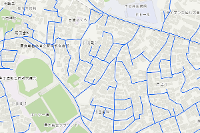

In [25]:
wm = gis.content.get("d392e88fd77a4d28b332f63945e7290c")
wm

In [26]:
from arcgis.mapping import WebMap
wm = WebMap(wm)
wm.definition.spatialReference

{
  "wkid": 102100,
  "latestWkid": 3857
}

In [27]:
item_prop = {'title': 'area_point_3857',
             'snippet': 'test',
             'tags': ['test']}

In [28]:
wm.offline_areas.create(area=extent,
                        item_properties=item_prop,
                        min_scale=36111.909643,
                        max_scale=18055.954822)

<Item title:"area_point_3857" type:Map Area owner:Nakamura_Hiromu>

結果：maxとmin以外の2点がずれる

---

### feturesetからpolygonを作成し、geoextentを取得して渡す

In [30]:
fset = a.query(where = "図郭番号 = 'AF3'")
fset

<FeatureSet> 1 features

In [31]:
fset.to_dict()["features"][0]["geometry"]

{'rings': [[[-18384.4400000004, -50765.5270000007],
   [-18384.4400000004, -50265.5270000007],
   [-17884.4400000004, -50265.5270000007],
   [-17884.4400000004, -50765.5270000007],
   [-18384.4400000004, -50765.5270000007]]]}

In [32]:
from arcgis.geometry import Geometry

In [39]:
poly = Geometry({'rings': [[[-18384.4400000004, -50765.5270000007],
                            [-18384.4400000004, -50265.5270000007],
                            [-17884.4400000004, -50265.5270000007],
                            [-17884.4400000004, -50765.5270000007],
                            [-18384.4400000004, -50765.5270000007]]],
                 "spatialReference" : {"wkid" : 102618}})

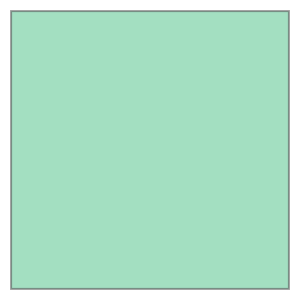

In [40]:
poly

In [41]:
from arcgis.geometry import SpatialReference
sr = SpatialReference(wkid = 102100)
sr

{'wkid': 102100}

In [43]:
new_poly = poly.project_as(sr, transformation_name="JGD_2011_To_WGS_1984")

In [45]:
new_poly.coordinates()

array([[[15543604.797888  ,  4237817.14485148],
        [15543603.53500034,  4238433.7499707 ],
        [15544217.41843495,  4238435.00138223],
        [15544218.64697671,  4237818.39598585],
        [15543604.797888  ,  4237817.14485148]]])

In [1009]:
print(new_poly.geoextent)
print(new_poly.extent)

(15543603.535000337, 4237817.144851482, 15544218.646976708, 4238435.001382229)
(15543603.535000337, 4237817.144851482, 15544218.646976708, 4238435.001382229)


In [648]:
extent = {'xmin': 15543603.535000337,
          'ymin': 4237817.144851482,
          'xmax': 15544218.646976708,
          'ymax': 4238435.001382229,
          'spatialReference': {'wkid': 102100}} 

<Item title:"kunihara_water_さーびす" type:Web Map owner:Nakamura_Hiromu>
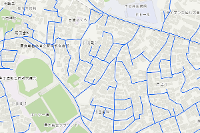

In [48]:
wm = gis.content.get("d392e88fd77a4d28b332f63945e7290c")
wm

In [49]:
from arcgis.mapping import WebMap
wm = WebMap(wm)
wm.definition.spatialReference

{
  "wkid": 102100,
  "latestWkid": 3857
}

In [50]:
item_prop = {'title': 'poly_extent',
             'snippet': 'test',
             'tags': ['test']}

In [53]:
new_poly.JSON.

'{"rings":[[[15544218.647,4237818.3959999979],[15543604.797899999,4237817.1449000016],[15543603.534999996,4238433.75],[15544217.418399997,4238435.0014000013],[15544218.647,4237818.3959999979]]],"spatialReference":{"wkid":102100,"latestWkid":3857}}'

In [59]:
poly_dict = {"rings":[[[15544218.647,4237818.3959999979],[15543604.797899999,4237817.1449000016],[15543603.534999996,4238433.75],[15544217.418399997,4238435.0014000013],[15544218.647,4237818.3959999979]]],"spatialReference":{"wkid":102100,"latestWkid":3857}}

In [56]:
from arcgis._impl import tools

In [66]:
test = tools._PackagingTools(url = "https://packaging.arcgis.com/arcgis/rest/services/OfflinePackaging/GPServer", gis = gis)

In [67]:
test.create_map_area(map_item_id="d392e88fd77a4d28b332f63945e7290c",
                     area_type="polygon",
                     area=poly_dict,
                     output_name="create_from_source_poly",
                     gis = gis)

Expecting value: line 1 column 1 (char 0)
Failed to execute (CreateMapArea).
Failed.


Exception: Job failed.

In [55]:
wm.offline_areas.create(area=test,
                        item_properties=item_prop,
                        min_scale=36111.909643,
                        max_scale=18055.954822)

{"code": 3, "messageCode": "OffPkg_  3", "message": "Item 95c3d344c7e44f448252f88069c5848d missing properties extent or area", "params": {"itemId": "95c3d344c7e44f448252f88069c5848d", "properties": "extent or area"}}
Failed to execute (SetupMapArea).
Failed.


Exception: Job failed.

In [268]:
wm.offline_areas.create(area=extent,
                        item_properties=item_prop,
                        min_scale=18055.954822,
                        max_scale=36111.909643)

<Item title:"poly_extent" type:Map Area owner:Nakamura_Hiromu>

In [71]:
wm.offline_areas.__gp

結果：クエリ時にSRをWebメルカトルに変換したときと同じ結果

---

### point -> geoextent

In [292]:
fset = a.query(where = "図郭番号 = 'AF3'", return_extent_only=True)
extent = fset["extent"]
extent

{'xmin': -18384.44000000041,
 'ymin': -50765.5270000007,
 'xmax': -17884.44000000041,
 'ymax': -50265.5270000007,
 'spatialReference': {'wkid': 102618, 'latestWkid': 6677}}

In [293]:
from arcgis.geometry import Point

In [294]:
point = Point({"x" : -18384.44000000041, "y" : -50765.5270000007, "spatialReference" : {"wkid" : 102618}})
point.centroid

(-18384.44000000041, -50765.5270000007)

In [295]:
from arcgis.geometry import SpatialReference
sr = SpatialReference(wkid = 102100)
sr

{'wkid': 102100}

In [296]:
newpoint_geoextent_1 = point.project_as(spatial_reference=sr)
newpoint_geoextent_1.geoextent

(15543604.797888003, 4237817.144851482, 15543604.797888003, 4237817.144851482)

In [297]:
point = Point({"x" : -17884.44000000041, "y" : -50265.5270000007, "spatialReference" : {"wkid" : 102618}})
point.centroid

(-17884.44000000041, -50265.5270000007)

In [298]:
newpoint_geoextent_2 = point.project_as(spatial_reference=sr)
newpoint_geoextent_2.geoextent

(15544217.418434951, 4238435.001382229, 15544217.418434951, 4238435.001382229)

In [300]:
extent = {'xmin': 15543604.797888003,
          'ymin': 4237817.144851482,
          'xmax': 15544217.418434951,
          'ymax': 4238435.001382229,
          'spatialReference': {'wkid': 102100}}

<Item title:"kunihara_water_さーびす" type:Web Map owner:Nakamura_Hiromu>
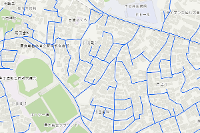

In [301]:
wm = gis.content.get("d392e88fd77a4d28b332f63945e7290c")
wm

In [302]:
from arcgis.mapping import WebMap
wm = WebMap(wm)
wm.definition.spatialReference

{
  "wkid": 102100,
  "latestWkid": 3857
}

In [307]:
item_prop = {'title': 'area_point_geoextent',
             'snippet': 'test',
             'tags': ['test']}

In [308]:
wm.offline_areas.create(area=extent,
                        item_properties=item_prop,
                        min_scale=18055.954822,
                        max_scale=36111.909643)

<Item title:"area_point_geoextent" type:Map Area owner:Nakamura_Hiromu>

結果：maxとmin以外の2点がずれる

---

### pointのminとmax変える

In [652]:
fset = a.query(where = "図郭番号 = 'AF3'", return_extent_only=True)
extent = fset["extent"]
extent

{'xmin': -18384.44000000041,
 'ymin': -50765.5270000007,
 'xmax': -17884.44000000041,
 'ymax': -50265.5270000007,
 'spatialReference': {'wkid': 102618, 'latestWkid': 6677}}

In [653]:
from arcgis.geometry import Point

In [654]:
point = Point({"x" : -18384.44000000041, "y" : -50765.5270000007, "spatialReference" : {"wkid" : 102618}})
point.centroid

(-18384.44000000041, -50765.5270000007)

In [655]:
from arcgis.geometry import SpatialReference
sr = SpatialReference(wkid = 102100)
sr

{'wkid': 102100}

In [656]:
newpoint_geoextent_1 = point.project_as(spatial_reference=sr)
newpoint_geoextent_1.geoextent

(15543604.797888003, 4237817.144851482, 15543604.797888003, 4237817.144851482)

In [657]:
point = Point({"x" : -17884.44000000041, "y" : -50265.5270000007, "spatialReference" : {"wkid" : 102618}})
point.centroid

(-17884.44000000041, -50265.5270000007)

In [658]:
newpoint_geoextent_2 = point.project_as(spatial_reference=sr)
newpoint_geoextent_2.geoextent

(15544217.418434951, 4238435.001382229, 15544217.418434951, 4238435.001382229)

In [659]:
extent = {'xmin': 4237817.144851482,
          'ymin': 15543604.797888003,
          'xmax': 4238435.001382229,
          'ymax': 15544217.418434951,
          'spatialReference': {'wkid': 102100}}

<Item title:"kunihara_water_さーびす" type:Web Map owner:Nakamura_Hiromu>
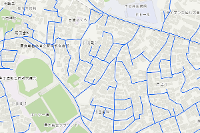

In [660]:
wm = gis.content.get("d392e88fd77a4d28b332f63945e7290c")
wm

In [661]:
from arcgis.mapping import WebMap
wm = WebMap(wm)
wm.definition.spatialReference

{
  "wkid": 102100,
  "latestWkid": 3857
}

In [662]:
item_prop = {'title': 'area_reverse_xy',
             'snippet': 'test',
             'tags': ['test']}

In [384]:
wm.offline_areas.create(area=extent,
                        item_properties=item_prop,
                        min_scale=18055.954822,
                        max_scale=36111.909643)

<Item title:"area_reverse_xy" type:Map Area owner:Nakamura_Hiromu>

---

### ring で渡す

In [1028]:
fset = a.query(where = "図郭番号 = 'AF3'")
fset

<FeatureSet> 1 features

In [1029]:
fset.to_dict()["features"][0]["geometry"]

{'rings': [[[-18384.4400000004, -50765.5270000007],
   [-18384.4400000004, -50265.5270000007],
   [-17884.4400000004, -50265.5270000007],
   [-17884.4400000004, -50765.5270000007],
   [-18384.4400000004, -50765.5270000007]]]}

In [1030]:
from arcgis.geometry import Geometry

In [1031]:
poly = Geometry({'rings': [[[-18384.4400000004, -50765.5270000007],
                            [-18384.4400000004, -50265.5270000007],
                            [-17884.4400000004, -50265.5270000007],
                            [-17884.4400000004, -50765.5270000007],
                            [-18384.4400000004, -50765.5270000007]]],
                 "spatialReference" : {"wkid" : 102618}})

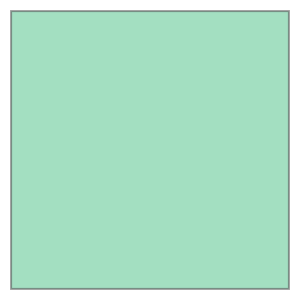

In [1032]:
poly

In [1033]:
poly.spatial_reference

{'wkid': 102618}

In [1034]:
from arcgis.geometry import SpatialReference
sr = SpatialReference(wkid = 3857)
sr

{'wkid': 3857}

In [1035]:
new_poly = poly.project_as(sr)

In [1036]:
new_poly.spatial_reference

{'wkid': 102100, 'latestWkid': 3857}

In [1037]:
coord = new_poly.coordinates().tolist()
coord[0]

[[15543604.797888003, 4237817.144851482],
 [15543603.535000337, 4238433.749970699],
 [15544217.418434951, 4238435.001382229],
 [15544218.646976708, 4237818.395985852],
 [15543604.797888003, 4237817.144851482]]

In [1038]:
coord[0].pop(4)

[15543604.797888003, 4237817.144851482]

In [1045]:
coord[0]

[[15543604.797888003, 4237817.144851482],
 [15543603.535000337, 4238433.749970699],
 [15544217.418434951, 4238435.001382229],
 [15544218.646976708, 4237818.395985852]]

<Item title:"kunihara_water_さーびす" type:Web Map owner:Nakamura_Hiromu>
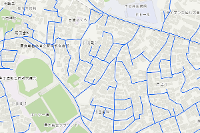

In [1041]:
wm = gis.content.get("d392e88fd77a4d28b332f63945e7290c")
wm

In [1042]:
from arcgis.mapping import WebMap
wm = WebMap(wm)
wm.definition.spatialReference

{
  "wkid": 102100,
  "latestWkid": 3857
}

In [1043]:
item_prop = {'title': 'poly_ring',
             'snippet': 'test',
             'tags': ['test']}

In [1046]:
wm.offline_areas.create(area=coord[0],
                        item_properties=item_prop,
                        min_scale=18055.954822,
                        max_scale=36111.909643)

Submitted.
Executing...
Start Time: Friday, June 12, 2020 1:07:46 PM
Running script CreateMapArea...
CreateMapArea GP Job: x_____x6zyNNWxz7Cg-orX1cMvzRg..x_____xj809d4edefd5b475ab74efc798c7bbcfa finished successfully.
Submitted.
Executing...
Start Time: Friday, June 12, 2020 1:07:53 PM
Running script SetupMapArea...
kunihara_water_さーびす_WFL1/FeatureServer - Get Service Definition
kunihara_water_さーびす_WFL1/FeatureServer - Submit replica job
kunihara_water_さーびす_WFL1/FeatureServer - Add/Update package item
kunihara_water_さーびす_WFL1/FeatureServer - Processing complete
SetupMapArea GP Job: x_____x6zyNNWxz7Cg-orX1cMvzRg..x_____xjf4ccd831b1cb453abfa7ba4dd73727ea finished successfully.


<Item title:"poly_ring" type:Map Area owner:Nakamura_Hiromu>

---

### 平面直角のエクステントでポイントを作成し、SpatialReferenceでwgs84に変換してから渡す

In [1047]:
fset = a.query(where = "図郭番号 = 'AF3'", return_extent_only=True)
extent = fset["extent"]
extent

{'xmin': -18384.44000000041,
 'ymin': -50765.5270000007,
 'xmax': -17884.44000000041,
 'ymax': -50265.5270000007,
 'spatialReference': {'wkid': 102618, 'latestWkid': 6677}}

In [1048]:
from arcgis.geometry import Point

In [1049]:
point = Point({"x" : -18384.44000000041, "y" : -50765.5270000007, "spatialReference" : {"wkid" : 102618}})
point.centroid

(-18384.44000000041, -50765.5270000007)

In [1050]:
from arcgis.geometry import SpatialReference
sr = SpatialReference(wkid = 4326)
sr

{'wkid': 4326}

In [1051]:
new1 = point.project_as(spatial_reference=sr)
new1.centroid

(139.63057760256316, 35.542250258564614)

In [1052]:
point = Point({"x" : -17884.44000000041, "y" : -50265.5270000007, "spatialReference" : {"wkid" : 102618}})
point.centroid

(-17884.44000000041, -50265.5270000007)

In [1053]:
new2 = point.project_as(spatial_reference=sr)
new2.centroid

(139.63608086657004, 35.54676633853776)

In [1054]:
extent = {'xmin': 139.63057760256316,
          'ymin': 35.542250258564614,
          'xmax': 139.63608086657004,
          'ymax': 35.54676633853776,
          'spatialReference': {'wkid': 4326}} 

<Item title:"kunihara_water_さーびす" type:Web Map owner:Nakamura_Hiromu>
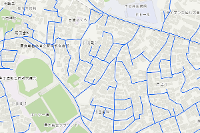

In [1065]:
wm = gis.content.get("d392e88fd77a4d28b332f63945e7290c")
wm

In [1066]:
from arcgis.mapping import WebMap
wm = WebMap(wm)
wm.definition.spatialReference

{
  "wkid": 102100,
  "latestWkid": 3857
}

In [1063]:
item_prop = {'title': 'area_point_4326',
             'snippet': 'test',
             'tags': ['test']}

In [1067]:
wm.offline_areas.create(area=extent,
                        item_properties=item_prop,
                        min_scale=36111.909643,
                        max_scale=18055.954822)

Submitted.
Executing...
Start Time: Friday, June 12, 2020 1:09:50 PM
Running script CreateMapArea...
Completed script CreateMapArea...
Succeeded at Friday, June 12, 2020 1:09:52 PM (Elapsed Time: 1.63 seconds)
CreateMapArea GP Job: x_____x6zyNNWxz7Cg-orX1cMvzRg..x_____xjaa6c4f10a37b48e1a861d8a55b83ce30 finished successfully.
Submitted.
Executing...
Start Time: Friday, June 12, 2020 1:10:43 PM
Running script SetupMapArea...
kunihara_water_さーびす_WFL1/FeatureServer - Get Service Definition
kunihara_water_さーびす_WFL1/FeatureServer - Submit replica job
kunihara_water_さーびす_WFL1/FeatureServer - Add/Update package item
kunihara_water_さーびす_WFL1/FeatureServer - Processing complete
Completed script SetupMapArea...
Succeeded at Friday, June 12, 2020 1:11:19 PM (Elapsed Time: 36.23 seconds)
SetupMapArea GP Job: x_____xTwPeRg5tQfrLowkK0gxr-Q..x_____xjf3397dc513334fa4afae5699f36d1479 finished successfully.


<Item title:"area_point_4326" type:Map Area owner:Nakamura_Hiromu>

In [1026]:
wm._webmapdict["spatialReference"] = {"wkid": 102100, "latestWkid": 3857}

In [1027]:
wm.update()

True

結果：失敗する

---

### 平面直角のエクステントでポイントを作成し、SpatialReferenceでwgs84に変換してから渡す

In [1068]:
fset = a.query(where = "図郭番号 = 'AF3'", return_extent_only=True)
extent = fset["extent"]
extent

{'xmin': -18384.44000000041,
 'ymin': -50765.5270000007,
 'xmax': -17884.44000000041,
 'ymax': -50265.5270000007,
 'spatialReference': {'wkid': 102618, 'latestWkid': 6677}}

In [1069]:
from arcgis.geometry import Point

In [1070]:
point = Point({"x" : -18384.44000000041, "y" : -50765.5270000007, "spatialReference" : {"wkid" : 102618}})
point.centroid

(-18384.44000000041, -50765.5270000007)

In [1071]:
from arcgis.geometry import SpatialReference
sr = SpatialReference(wkid = 4326)
sr

{'wkid': 4326}

In [1072]:
new1 = point.project_as(spatial_reference=sr)
new1.centroid

(139.63057760256316, 35.542250258564614)

In [1073]:
point = Point({"x" : -17884.44000000041, "y" : -50265.5270000007, "spatialReference" : {"wkid" : 102618}})
point.centroid

(-17884.44000000041, -50265.5270000007)

In [1074]:
new2 = point.project_as(spatial_reference=sr)
new2.centroid

(139.63608086657004, 35.54676633853776)

In [1075]:
extent = {'xmin': 139.63057760256316,
          'ymin': 35.542250258564614,
          'xmax': 139.63608086657004,
          'ymax': 35.54676633853776,
          'spatialReference': {'wkid': 4326}} 

In [1076]:
extent = [[139.63057760256316, 35.542250258564614], [139.63608086657004, 35.54676633853776]]

<Item title:"kunihara_water_さーびす" type:Web Map owner:Nakamura_Hiromu>
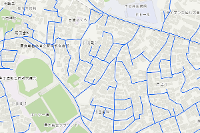

In [1077]:
wm = gis.content.get("d392e88fd77a4d28b332f63945e7290c")
wm

In [1078]:
from arcgis.mapping import WebMap
wm = WebMap(wm)
wm.definition.spatialReference

{
  "wkid": 102100,
  "latestWkid": 3857
}

In [1079]:
item_prop = {'title': 'area_point_4326_2',
             'snippet': 'test',
             'tags': ['test']}

In [1080]:
wm.offline_areas.create(area=extent,
                        item_properties=item_prop,
                        min_scale=36111.909643,
                        max_scale=18055.954822)

Submitted.
Executing...
Start Time: Friday, June 12, 2020 1:12:07 PM
Running script CreateMapArea...
Completed script CreateMapArea...
Succeeded at Friday, June 12, 2020 1:12:09 PM (Elapsed Time: 1.43 seconds)
CreateMapArea GP Job: x_____xwOJQr8Jk6q3lVM-vfGx5nA..x_____xj4edaea015db74edab43cbcd481edc8d0 finished successfully.
Submitted.
Executing...
Start Time: Friday, June 12, 2020 1:11:48 PM
Running script SetupMapArea...
kunihara_water_さーびす_WFL1/FeatureServer - Get Service Definition
kunihara_water_さーびす_WFL1/FeatureServer - Submit replica job
kunihara_water_さーびす_WFL1/FeatureServer - Add/Update package item
kunihara_water_さーびす_WFL1/FeatureServer - Processing complete
SetupMapArea GP Job: x_____x6zyNNWxz7Cg-orX1cMvzRg..x_____xjeff686384e644c8497c94017bdb6ecfa finished successfully.


<Item title:"area_point_4326_2" type:Map Area owner:Nakamura_Hiromu>

結果：失敗する

---

### Web マップを更新して平面直角にしてから平面直角のエクステントを渡す

In [1023]:
fset = a.query(where = "図郭番号 = 'AF3'", return_extent_only=True)
extent = fset["extent"]
extent

{'xmin': -18384.44000000041,
 'ymin': -50765.5270000007,
 'xmax': -17884.44000000041,
 'ymax': -50265.5270000007,
 'spatialReference': {'wkid': 102618, 'latestWkid': 6677}}

<Item title:"kunihara_water_さーびす" type:Web Map owner:Nakamura_Hiromu>
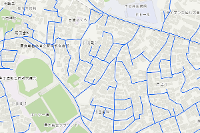

In [1024]:
wm = gis.content.get("d392e88fd77a4d28b332f63945e7290c")
wm

In [1025]:
from arcgis.mapping import WebMap
wm = WebMap(wm)
wm.definition.spatialReference

{
  "wkid": 4326,
  "latestWkid": 4326
}

In [822]:
wm._webmapdict["spatialReference"] = {"wkid": 102618, 'latestWkid': 6677}

In [823]:
wm._webmapdict["spatialReference"]

{'wkid': 102618, 'latestWkid': 6677}

In [824]:
wm.update()

True

<Item title:"kunihara_water_さーびす" type:Web Map owner:Nakamura_Hiromu>
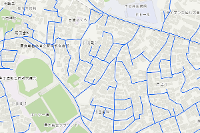

In [825]:
wm = gis.content.get("d392e88fd77a4d28b332f63945e7290c")
wm

In [826]:
from arcgis.mapping import WebMap
wm = WebMap(wm)
wm.definition.spatialReference

{
  "wkid": 102618,
  "latestWkid": 6677
}

In [827]:
fset = a.query(where = "図郭番号 = 'AF3'", return_extent_only=True)
extent = fset["extent"]
extent

{'xmin': -18384.44000000041,
 'ymin': -50765.5270000007,
 'xmax': -17884.44000000041,
 'ymax': -50265.5270000007,
 'spatialReference': {'wkid': 102618, 'latestWkid': 6677}}

In [828]:
item_prop = {'title': 'query_out_sr102618',
             'snippet': 'test',
             'tags': ['test']}

In [829]:
from arcgis import env
env.verbose = True

In [830]:
wm.offline_areas.create(area=extent,
                        item_properties=item_prop,
                        min_scale=18055.954822,
                        max_scale=36111.909643)

Submitted.
Executing...
Start Time: Friday, June 12, 2020 10:55:14 AM
Running script CreateMapArea...
CreateMapArea GP Job: x_____x6zyNNWxz7Cg-orX1cMvzRg..x_____xj6739ea117f00473e844c1b4f6a435909 finished successfully.
Submitted.
Executing...
Start Time: Friday, June 12, 2020 10:55:22 AM
Running script SetupMapArea...
kunihara_water_さーびす_WFL1/FeatureServer - Get Service Definition
kunihara_water_さーびす_WFL1/FeatureServer - Submit replica job
kunihara_water_さーびす_WFL1/FeatureServer - Add/Update package item
kunihara_water_さーびす_WFL1/FeatureServer - Processing complete
SetupMapArea GP Job: x_____x6zyNNWxz7Cg-orX1cMvzRg..x_____xj3c9897f4cd62489bbe4b6b2bb5dc565e finished successfully.


<Item title:"query_out_sr102618" type:Map Area owner:Nakamura_Hiromu>

失敗する

---

### ブックマーク作成して名前でやってみる

<Item title:"kunihara_water_さーびす" type:Web Map owner:Nakamura_Hiromu>
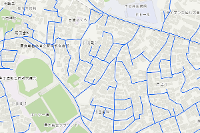

In [832]:
wm = gis.content.get("d392e88fd77a4d28b332f63945e7290c")
wm

In [834]:
from arcgis.mapping import WebMap
wm = WebMap(wm)
wm.definition.spatialReference

{
  "wkid": 102618,
  "latestWkid": 6677
}

In [835]:
wm._webmapdict["spatialReference"] = {'wkid': 102100, 'latestWkid': 3857}

In [836]:
wm.update()

True

<Item title:"kunihara_water_さーびす" type:Web Map owner:Nakamura_Hiromu>
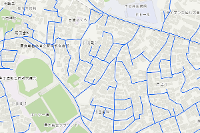

In [837]:
wm = gis.content.get("d392e88fd77a4d28b332f63945e7290c")
wm

In [838]:
from arcgis.mapping import WebMap
wm = WebMap(wm)
wm.definition.spatialReference

{
  "wkid": 102100,
  "latestWkid": 3857
}

In [840]:
wm.definition.bookmarks

[{
   "extent": {
     "spatialReference": {
       "wkid": 102100,
       "latestWkid": 3857
     },
     "xmax": 15545002.254397959,
     "xmin": 15544120.242751338,
     "ymax": 4240182.646119113,
     "ymin": 4239688.194092435
   },
   "name": "test"
 }]

In [844]:
wm.definition.bookmarks = [{"extent": {
    'spatialReference': {
        'wkid': 102100, 'latestWkid': 3857
    },
    'xmin': 15543604.797888003,
    'ymin': 4237817.144851482,
    'xmax': 15544217.418434951,
    'ymax': 4238435.001382229,
},
 "name": "AF3"
}]

In [845]:
wm.definition.bookmarks

[{
   "extent": {
     "spatialReference": {
       "wkid": 102100,
       "latestWkid": 3857
     },
     "xmin": 15543604.797888003,
     "ymin": 4237817.144851482,
     "xmax": 15544217.418434951,
     "ymax": 4238435.001382229
   },
   "name": "AF3"
 }]

In [846]:
wm.update()

True

In [848]:
wm.offline_areas.create(area="AF3",
                        item_properties=item_prop,
                        min_scale=18055.954822,
                        max_scale=36111.909643)

Submitted.
Executing...
Start Time: Friday, June 12, 2020 11:06:33 AM
Running script CreateMapArea...
CreateMapArea GP Job: x_____x6zyNNWxz7Cg-orX1cMvzRg..x_____xjbc86522882d44aeb9a8550230dd9a2e3 finished successfully.
Submitted.
Executing...
Start Time: Friday, June 12, 2020 11:06:40 AM
Running script SetupMapArea...
kunihara_water_さーびす_WFL1/FeatureServer - Get Service Definition
kunihara_water_さーびす_WFL1/FeatureServer - Submit replica job
World_Basemap_v2/VectorTileServer - Submit export job
World_Basemap_v2/VectorTileServer - Add/Update package item
kunihara_water_さーびす_WFL1/FeatureServer - Add/Update package item
kunihara_water_さーびす_WFL1/FeatureServer - Processing complete
World_Basemap_v2/VectorTileServer - Processing complete
Completed script SetupMapArea...
Succeeded at Friday, June 12, 2020 11:07:41 AM (Elapsed Time: 1 minutes 1 seconds)
SetupMapArea GP Job: x_____x6zyNNWxz7Cg-orX1cMvzRg..x_____xjc12067b4bf7d419ebaaa35a242386497 finished successfully.


<Item title:"query_out_sr102618" type:Map Area owner:Nakamura_Hiromu>

In [852]:
test = wm.offline_areas.list()[0]

In [854]:
test.properties

{'extent': {'spatialReference': {'wkid': 102100, 'latestWkid': 3857},
  'xmin': 15543604.797888003,
  'ymin': 4237817.144851482,
  'xmax': 15544217.418434951,
  'ymax': 4238435.001382229},
 'status': 'complete'}

In [888]:
test.

'GCS_WGS_1984'

---

### webメルカトルでアップロードしてやってみる

<Item title:"水道web_mercator" type:Web Map owner:Nakamura_Hiromu>
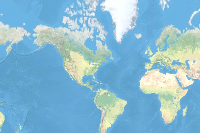

In [962]:
wm = gis.content.get("2932fb46028843e9aea98cc22d4a3e16")
wm

In [963]:
from arcgis.mapping import WebMap
wm = WebMap(wm)
wm.definition.spatialReference

{
  "wkid": 102100,
  "latestWkid": 3857
}

In [964]:
fs = gis.content.get("cd857093355f423e847b5a59f81db708")

In [965]:
a = [lyr for lyr in fs.layers if lyr.properties["name"] == "図郭_500_webmercator"]

In [966]:
a = a[0]

In [967]:
a

<FeatureLayer url:"https://services.arcgis.com/wlVTGRSYTzAbjjiC/arcgis/rest/services/水道web_mercator_WFL1/FeatureServer/1">

In [968]:
fset = a.query(where = "図郭番号 = 'AF3'", return_extent_only=True)
extent = fset["extent"]
extent

{'xmin': 15543603.534999996,
 'ymin': 4237817.144900002,
 'xmax': 15544218.647,
 'ymax': 4238435.001400001,
 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}

In [969]:
item_prop = {'title': 'webmercator_11',
             'snippet': 'test',
             'tags': ['test']}

In [971]:
wm.offline_areas.create(area=extent,
                        item_properties=item_prop,
                        min_scale=36111.909643,
                        max_scale=18055.954822)

Submitted.
Executing...
Start Time: Friday, June 12, 2020 12:48:50 PM
Running script CreateMapArea...
CreateMapArea GP Job: x_____xwOJQr8Jk6q3lVM-vfGx5nA..x_____xj058009bc341e40719fd799fd9b314c50 finished successfully.
Submitted.
Executing...
Start Time: Friday, June 12, 2020 12:48:58 PM
Running script SetupMapArea...
水道web_mercator_WFL1/FeatureServer - Get Service Definition
World_Basemap_v2/VectorTileServer - Submit export job
World_Basemap_v2/VectorTileServer - Add/Update package item
World_Basemap_v2/VectorTileServer - Processing complete
SetupMapArea GP Job: x_____xwOJQr8Jk6q3lVM-vfGx5nA..x_____xj3ce4c5befb2e484588fc64c72782511e finished successfully.


<Item title:"webmercator_11" type:Map Area owner:Nakamura_Hiromu>

In [30]:
from arcgis.geocoding import geocode

In [37]:
p = geocode("永田町駅")[0]

In [42]:
geocode("警察", location=p["location"])

[{'address': '警察',
  'location': {'x': 18.35424000000006, 'y': 42.70413000000008},
  'score': 100,
  'attributes': {'Loc_name': 'World',
   'Status': 'M',
   'Score': 100,
   'Match_addr': '警察',
   'LongLabel': '警察, Ulica Republike Srpske, 89101, Требиње, 特雷比涅区, 塞族共和国, BIH',
   'ShortLabel': '警察',
   'Addr_type': 'POI',
   'Type': 'Train Station',
   'PlaceName': '警察',
   'Place_addr': 'Ulica Republike Srpske, 89101, Требиње, 特雷比涅区, 塞族共和国',
   'Phone': '',
   'URL': '',
   'Rank': 24,
   'AddBldg': '',
   'AddNum': '',
   'AddNumFrom': '',
   'AddNumTo': '',
   'AddRange': '',
   'Side': '',
   'StPreDir': '',
   'StPreType': 'Ulica',
   'StName': 'Republike Srpske',
   'StType': '',
   'StDir': '',
   'BldgType': '',
   'BldgName': '',
   'LevelType': '',
   'LevelName': '',
   'UnitType': '',
   'UnitName': '',
   'SubAddr': '',
   'StAddr': 'Ulica Republike Srpske',
   'Block': '',
   'Sector': '',
   'Nbrhd': '',
   'District': '',
   'City': 'Требиње',
   'MetroArea': '',
   'Subr